In [1]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stanley\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
abs_2018 = pd.read_csv("Abs_2018.csv") 

In [5]:
abs_2018.head()

,PROJECT_ID,ABSTRACT
0,983089,"Project(Summary(/(Abstract(!An!estimated!40,00..."
1,1005000,DESCRIPTION (provided by applicant): There is ...
2,1005001,"PROJECT ABSTRACTTo date, colorectal cancer (CR..."
3,1005002,"Project Summary / Abstract In this project, th..."
4,1005003,﻿ DESCRIPTION (provided by applicant) The ...


In [6]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [7]:
from collections import Counter

In [8]:
print(abs_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
PROJECT_ID    100 non-null int64
ABSTRACT      100 non-null object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None


In [9]:
abs_2018['ABSTRACT'][0]

'Project(Summary(/(Abstract(!An!estimated!40,000!infants!delivered!annually!in!the!United!States!are!born!with!birth!defects!caused!by!the!use!of!medication!during!pregnancy.!!Since!the!peak!prevalence!of!some!diseases,!such!as!hypertension,!autoimmune!disease,!and!depression,!occurs!during!the!childbearing!years,!it!is!not!surprising!that!medication!use!during!pregnancy!is!common,!with!nine!out!of!ten!pregnant!women!in!the!United!States!taking!at!least!one!medication!to!treat!a!medical!condition.!!Although!recent!advances!in!technology!have!increased!access!to!health!care!information,!evidence-based!information!related!to!the!use!of!medications!during!pregnancy!can!be!difficult!to!find.!!Even!so,!much!of!the!information!that!is!available!is!inadequate!when!it!comes!to!prescribing!for!the!individual!patient,!or!it!is!not!easily!understood!or!evaluated!by!healthcare!providers!(HCPs)!who!lack!specialized!training!in!teratology.!!As!the!Center!for!Disease!Control!&!Prevention!notes,!a!few

In [10]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [13]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [14]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
# Convert to list
data = abs_2018.ABSTRACT.values.tolist()

In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['project', 'summary', 'abstract', 'an', 'estimated', 'infants', 'delivered', 'annually', 'in', 'the', 'united', 'states', 'are', 'born', 'with', 'birth', 'defects', 'caused', 'by', 'the', 'use', 'of', 'medication', 'during', 'pregnancy', 'since', 'the', 'peak', 'prevalence', 'of', 'some', 'diseases', 'such', 'as', 'hypertension', 'autoimmune', 'disease', 'and', 'depression', 'occurs', 'during', 'the', 'childbearing', 'years', 'it', 'is', 'not', 'surprising', 'that', 'medication', 'use', 'during', 'pregnancy', 'is', 'common', 'with', 'nine', 'out', 'of', 'ten', 'pregnant', 'women', 'in', 'the', 'united', 'states', 'taking', 'at', 'least', 'one', 'medication', 'to', 'treat', 'medical', 'condition', 'although', 'recent', 'advances', 'in', 'technology', 'have', 'increased', 'access', 'to', 'health', 'care', 'information', 'evidence', 'based', 'information', 'related', 'to', 'the', 'use', 'of', 'medications', 'during', 'pregnancy', 'can', 'be', 'difficult', 'to', 'find', 'even', 'so', 'mu

In [17]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

In [18]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [19]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['project_summary_abstract', 'an', 'estimated', 'infants', 'delivered', 'annually', 'in', 'the', 'united_states', 'are', 'born', 'with', 'birth', 'defects', 'caused', 'by', 'the', 'use', 'of', 'medication', 'during', 'pregnancy', 'since', 'the', 'peak', 'prevalence', 'of', 'some', 'diseases', 'such', 'as', 'hypertension', 'autoimmune', 'disease', 'and', 'depression', 'occurs', 'during', 'the', 'childbearing', 'years', 'it', 'is', 'not', 'surprising', 'that', 'medication', 'use', 'during', 'pregnancy', 'is', 'common', 'with', 'nine', 'out', 'of', 'ten', 'pregnant', 'women', 'in', 'the', 'united_states', 'taking', 'at', 'least', 'one', 'medication', 'to', 'treat', 'medical', 'condition', 'although', 'recent', 'advances', 'in', 'technology', 'have', 'increased', 'access', 'to', 'health', 'care', 'information', 'evidence', 'based', 'information', 'related', 'to', 'the', 'use', 'of', 'medications', 'during', 'pregnancy', 'can', 'be', 'difficult', 'to', 'find', 'even', 'so', 'much', 'of', 't

In [20]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [21]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [22]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [23]:
from spacy.lang.en import English 

In [24]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load(r'C:\Users\Stanley\Anaconda3\Lib\site-packages\en_core_web_sm\en_core_web_sm-2.2.5', disable=['parser', 'ner'])


In [25]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [26]:
print(data_lemmatized[:1])

[['estimate', 'infant', 'deliver', 'annually', 'bear', 'birth', 'defect', 'cause', 'use', 'medication', 'pregnancy', 'peak', 'prevalence', 'disease', 'disease', 'depression', 'occur', 'childbeare', 'year', 'surprising', 'medication', 'use', 'pregnancy', 'common', 'pregnant', 'woman', 'united_state', 'take', 'least', 'medication', 'treat', 'medical', 'condition', 'recent', 'advance', 'technology', 'increase', 'access', 'health', 'care', 'information', 'evidence', 'base', 'information', 'relate', 'use', 'medication', 'pregnancy', 'difficult', 'find', 'even', 'much', 'information', 'available', 'inadequate', 'come', 'prescribe', 'individual', 'patient', 'easily', 'understand', 'evaluate', 'healthcare', 'provider', 'lack', 'specialized', 'training', 'teratology', 'center', 'note', 'database', 'exist', 'provide', 'expert', 'review', 'interpretation', 'available', 'scientific', 'datum', 'regard', 'adverse', 'effect', 'medication', 'fetus', 'resource', 'generally', 'available', 'subscription'

In [27]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [28]:
# Create Corpus
texts = data_lemmatized

In [29]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [30]:
# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 4), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 2), (35, 4), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 8), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 7), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [31]:
id2word[0]

'access'

In [32]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('access', 2),
  ('additional', 1),
  ('address', 1),
  ('advance', 1),
  ('adverse', 1),
  ('allow', 1),
  ('alternative', 2),
  ('annually', 1),
  ('app', 1),
  ('application', 1),
  ('available', 4),
  ('base', 3),
  ('bear', 1),
  ('better', 1),
  ('birth', 1),
  ('breastfeed', 1),
  ('care', 2),
  ('cause', 1),
  ('center', 1),
  ('child', 1),
  ('childbeare', 1),
  ('clinical', 1),
  ('collaborate', 1),
  ('collect', 1),
  ('come', 1),
  ('common', 1),
  ('concise', 1),
  ('condition', 1),
  ('consolidated', 1),
  ('continue', 1),
  ('create', 2),
  ('critical', 1),
  ('current', 1),
  ('data', 1),
  ('database', 2),
  ('datum', 4),
  ('defect', 1),
  ('deliver', 1),
  ('delivery', 1),
  ('depression', 1),
  ('design', 1),
  ('detailed', 1),
  ('develop', 1),
  ('development', 1),
  ('device', 1),
  ('different', 1),
  ('difficult', 1),
  ('dilemma', 2),
  ('disease', 2),
  ('diverse', 1),
  ('dosage', 1),
  ('drug', 1),
  ('easily', 2),
  ('easy', 1),
  ('effect', 1),
  ('elec

In [33]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"project" + 0.014*"temperature" + 0.013*"datum" + 0.011*"core" + '
  '0.011*"clinical" + 0.009*"study" + 0.007*"novel" + 0.007*"develop" + '
  '0.007*"parasite" + 0.007*"use"'),
 (1,
  '0.011*"cell" + 0.009*"aim" + 0.008*"specific" + 0.008*"drug" + '
  '0.008*"hypothesis" + 0.007*"model" + 0.007*"study" + 0.006*"effect" + '
  '0.006*"test" + 0.006*"target"'),
 (2,
  '0.014*"model" + 0.011*"irritability" + 0.010*"system" + 0.010*"respiratory" '
  '+ 0.009*"study" + 0.009*"tumor" + 0.009*"gbm" + 0.009*"brain" + 0.008*"use" '
  '+ 0.008*"control"'),
 (3,
  '0.010*"cell" + 0.009*"signature" + 0.009*"datum" + 0.007*"project" + '
  '0.007*"process" + 0.007*"model" + 0.007*"visual" + 0.006*"use" + '
  '0.006*"type" + 0.006*"core"'),
 (4,
  '0.014*"atherosclerosis" + 0.012*"study" + 0.012*"aim" + 0.011*"use" + '
  '0.010*"protein" + 0.009*"circuit" + 0.007*"biogenesis" + 0.007*"effector" + '
  '0.007*"respond" + 0.007*"promoter"'),
 (5,
  '0.012*"cell" + 0.011*"muscle" + 0.011*"p

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.832524975418561


In [36]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31197360858856515


In [37]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Stanley\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.132586 -0.022100       1        1  13.356900
9      0.130484  0.007197       2        1   8.723411
12    -0.048968  0.098982       3        1   7.681202
1      0.002852  0.068740       4        1   7.474145
2      0.007318  0.123595       5        1   7.233072
3     -0.005566  0.121045       6        1   6.890105
16     0.038841  0.053491       7        1   5.728430
15     0.080095 -0.105473       8        1   5.605472
8      0.105764 -0.024243       9        1   5.272638
18     0.096971 -0.038760      10        1   4.620634
11     0.042959 -0.034545      11        1   4.573422
5     -0.072262  0.070633      12        1   3.917308
19    -0.033167  0.019160      13        1   3.804611
17    -0.060534  0.009113      14        1   3.464733
4     -0.049684  0.011684      15        1   2.742728
0      0.007686 -0.053056      16        1   2.401799
14    -0.082826 -0.052438      17        1   2.330547
13    -0.112344 -0.080530      18        1   2.084545
10    -0.104290 -0.048712      19        1   1.069516
6     -0.075916 -0.123782      20        1   1.024785, topic_info=     Category        Freq            Term       Total  loglift  logprob
183   Default  152.000000            cell  152.000000  30.0000  30.0000
1000  Default   55.000000            core   55.000000  29.0000  29.0000
381   Default   51.000000           tumor   51.000000  28.0000  28.0000
16    Default   34.000000            care   34.000000  27.0000  27.0000
288   Default   64.000000          cancer   64.000000  26.0000  26.0000
429   Default   52.000000            high   52.000000  25.0000  25.0000
125   Default   84.000000         project   84.000000  24.0000  24.0000
2391  Default   17.000000         vaccine   17.000000  23.0000  23.0000
366   Default  116.000000           study  116.000000  22.0000  22.0000
111   Default   66.000000         patient   66.000000  21.0000  21.0000
467   Default   53.000000         protein   53.000000  20.0000  20.0000
362   Default   35.000000            role   35.000000  19.0000  19.0000
471   Default   37.000000            risk   37.000000  18.0000  18.0000
465   Default   70.000000         program   70.000000  17.0000  17.0000
1327  Default   16.000000          neuron   16.000000  16.0000  16.0000
17    Default   26.000000           cause   26.000000  15.0000  15.0000
710   Default   23.000000         outcome   23.000000  14.0000  14.0000
35    Default   69.000000           datum   69.000000  13.0000  13.0000
136   Default   96.000000        research   96.000000  12.0000  12.0000
455   Default   28.000000        mutation   28.000000  11.0000  11.0000
306   Default   11.000000           death   11.000000  10.0000  10.0000
1792  Default   16.000000          animal   16.000000   9.0000   9.0000
323   Default   50.000000           human   50.000000   8.0000   8.0000
21    Default   54.000000        clinical   54.000000   7.0000   7.0000
2585  Default   15.000000    irritability   15.000000   6.0000   6.0000
76    Default   29.000000          health   29.000000   5.0000   5.0000
2752  Default   19.000000          muscle   19.000000   4.0000   4.0000
210   Default   60.000000        function   60.000000   3.0000   3.0000
742   Default   19.000000           trial   19.000000   2.0000   2.0000
730   Default   60.000000        specific   60.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
622   Topic20    0.493802      infarction    1.955199   3.2046  -5.9366
863   Topic20    0.493420        tolerate    1.996780   3.1828  -5.9374
2406  Topic20    0.493843      randomized    2.079475   3.1430  -5.9366
2410  Topic20    0.494424     substantial    2.110009   3.1296  -5.9354
2391  Topic20    3.786900         vaccine   17.633362   3.0424  -3.8995
476   Topic20    0.493650    significance    2.847932   2.8282  -5.9369
2113  Topic20    0.493729        

In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [46]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

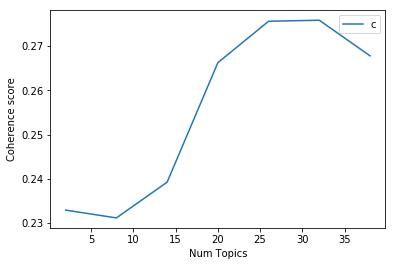

In [47]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [48]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2329
Num Topics = 8  has Coherence Value of 0.2312
Num Topics = 14  has Coherence Value of 0.2392
Num Topics = 20  has Coherence Value of 0.2662
Num Topics = 26  has Coherence Value of 0.2756
Num Topics = 32  has Coherence Value of 0.2758
Num Topics = 38  has Coherence Value of 0.2678
